## Title: NLP for Sentiment Analysis on Tweets on Apple and Google Products
## Student: Reagan Adajo

## Overview
This project aims to build a natural language processing (NLP) model that will rate the sentiments of a Tweet based on its content

The project will utilize two classification models to analyze the Tweets (Logistics Regression and Random Forest). The best Model will be determine for consequent adoption by the respective companies for automated sentiment rating

The outcomes of best-performing model will be used by the relevant companies to improve their brand, product, or service, among other decisions

## Business and Data Understanding:
### Business Problem
The company wants to develop a model that will assist in judging people's emotions about brands and products using Tweets on Apple and Google products. 
### Business Aim
To build a model that judges customer's emotions on brands and products using their sentiments
### Business Objectives
1. To find out if a Tweet can demonstrate a sentiment on Apple and Google products
2. To identify the products with the most positive and negative sentiments
3. To establish the best classification model for analyzing sentiments on Twitter texts(automatically)

## Data Understanding

In [94]:
#importing python library to view the data files
import pandas as pd
import numpy as np

#viewing the data file
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='ISO-8859-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


## Data Preparation

In [95]:
#cleaning the dataset 
#removing rows will null values
df = df.dropna()
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: count, dtype: int64

In [96]:
#checking for missing values
df.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

No missing values in the dataset

Exploratory Data Analysis

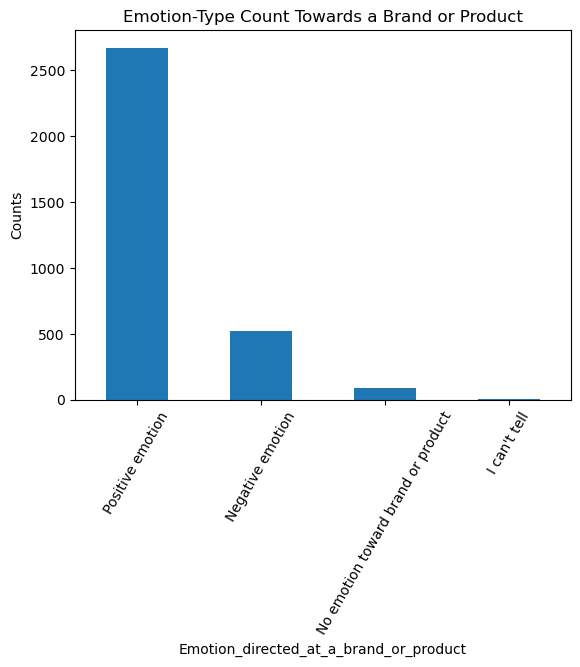

In [97]:
# importing python libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# bar plot for different of emotions
value_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Emotion_directed_at_a_brand_or_product')
plt.ylabel('Counts')
plt.title('Emotion-Type Count Towards a Brand or Product')
plt.xticks(rotation=60)
plt.show()

The bar plots shows the distribution of different emotions on Tweets

Tweets on both Google and Apple products were associated with high positive emotions.

In [98]:
# dropping rows to remain with positive and Negative emotions since the other sentiments will not be useful in the analysis
df_cleaned = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]
df_cleaned

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


Classifying the emotions into positive or negative helps understand the data better, or rather the sentiment

In [99]:
#counts directed towards brand or product
df_cleaned['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               918
Apple                              638
iPad or iPhone App                 460
Google                             414
iPhone                             287
Other Google product or service    283
Android App                         80
Android                             77
Other Apple product or service      34
Name: count, dtype: int64

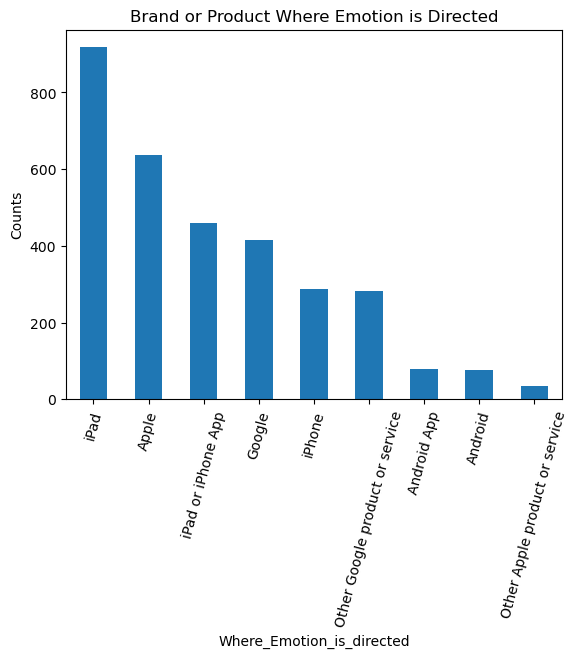

In [100]:
# bar plot on the brand/product emotion is directed
value_counts1 = df_cleaned['emotion_in_tweet_is_directed_at'].value_counts()
value_counts1.plot(kind='bar')
plt.xlabel('Where_Emotion_is_directed')
plt.ylabel('Counts')
plt.title('Brand or Product Where Emotion is Directed')
plt.xticks(rotation=75)
plt.show()

Apple and its related products received the highest emotional reaction on Tweets.

## Modeling

In [101]:
#initilize tokenizer, stemmer, and stopwords objects

# nltk imports
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Creating an intance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Preprocessing

In [102]:
#standard text preprocessing
import re
from nltk.stem import WordNetLemmatizer

def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text = text.lower()
    lemmatizer = WordNetLemmatizer()


    # Remove URLs, mentions, hashtags, and punctuation
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # removes URLs that start with http, https, or www.
    text = re.sub(r'@\w+|#', '', text) # Removing Mentions (@username) and Hashtags (#hashtag)
    text = re.sub(r'[^\w\s]', '', text)  # Removing Special Characters (Punctuation, Symbols, etc.)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    

    # Tokenize text using `tokenizer`
    
    tokens = tokenizer.tokenize(text)
    # Remove stopwords using `stopwords_list`
    tokens = [word for word in tokens if word not in stopwords_list]
    # Stem the tokenized text using `stemmer`
    tokens = [stemmer.stem(word) for word in tokens]
    # Return the preprocessed text
    return " ".join(tokens)


tweet_data = df_cleaned.tweet_text.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
tweet_data

0       iphon hr tweet riseaustin dead need upgrad plu...
1       know awesom ipadiphon app youll like appreci d...
2                                wait ipad also sale sxsw
3        hope year festiv isnt crashi year iphon app sxsw
4       great stuff fri sxsw marissa mayer googl tim o...
                              ...                        
9077    guy convinc switch back iphon great sxsw cover...
9079    quotpapyrussort like ipadquot nice lol sxsw lavel
9080    diller say googl quotmight run playstat xbox e...
9085    ive alway use camera iphon imag stabil mode su...
9088                             ipad everywher sxsw link
Name: tweet_text, Length: 3191, dtype: object

The preprocessed data is in lower case and all the unwanted symbols and words removed

In [103]:
#view the preprocessed dataset
df_cleaned["preprocessed_text"] = tweet_data
df_cleaned.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11336\3912262949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["preprocessed_text"] = tweet_data


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,iphon hr tweet riseaustin dead need upgrad plu...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesom ipadiphon app youll like appreci d...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,hope year festiv isnt crashi year iphon app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer googl tim o...


The preprocessed_text column has been engineered in the dataframe

In [104]:
#Checking the transformations in the two columns
df_cleaned[['tweet_text', 'preprocessed_text']]

,tweet_text,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphon hr tweet riseaustin dead need upgrad plu...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesom ipadiphon app youll like appreci d...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope year festiv isnt crashi year iphon app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer googl tim o...
...,...,...
9077,@mention your PR guy just convinced me to swit...,guy convinc switch back iphon great sxsw cover...
9079,&quot;papyrus...sort of like the ipad&quot; - ...,quotpapyrussort like ipadquot nice lol sxsw lavel
9080,Diller says Google TV &quot;might be run over ...,diller say googl quotmight run playstat xbox e...
9085,I've always used Camera+ for my iPhone b/c it ...,ive alway use camera iphon imag stabil mode su...


### Logistic Regression

random state = 42

split at 70-30

In [105]:
#train_test_split the data
#importing library
from sklearn.model_selection import train_test_split

X= df_cleaned['preprocessed_text']
y= df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

Creating a pipeline & fitting on the model

In [106]:
#imports
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Combines CountVectorizer & TfidfTransformer
    ('clf', LogisticRegression(max_iter=1000))])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=1000))])

## Evaluation


Evaluting the regression model

In [107]:
# Defining the predicted tweet variable
y_pred = pipeline.predict(X_test)

# Creating a function to evaluate our model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate_sentiment_model(df, pipeline):
   
    y_true = y_test # Actual Labels
    y_pred_lr = y_pred # Logistic Regression model predictions
    
    # results
    print("Classification Report:\n", classification_report(y_true=y_test, y_pred = y_pred_lr))

# Evaluating our model
evaluate_sentiment_model(df, pipeline)

Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.91      0.07      0.12       151
Positive emotion       0.85      1.00      0.92       807

        accuracy                           0.85       958
       macro avg       0.88      0.53      0.52       958
    weighted avg       0.86      0.85      0.79       958



The model has a high precision for both emotions with Negative at 0.91 and Positive at 0.85

In [108]:
# Getting the accuracy score of regression model
accuracy_score_log_reg = accuracy_score(y_test, y_pred)
accuracy_score_log_reg
print(f"The baseline Logistic Regression Model has an accuracy score of {accuracy_score_log_reg}")

The baseline Logistic Regression Model has an accuracy score of 0.8517745302713987


ConfusionMatrix

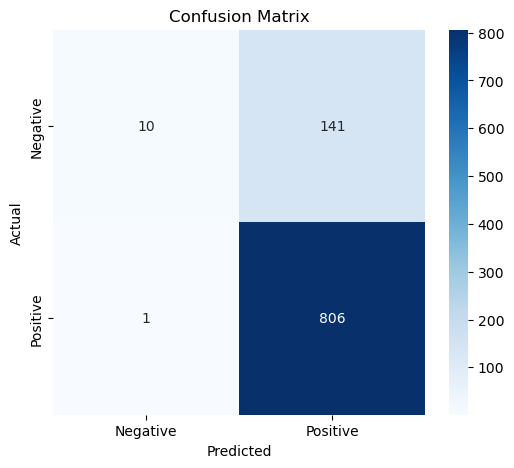

In [109]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Model

In [ ]:
#imports
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Changing the model in the pipeline to Random Forest and setting the parameters
pipeline_rf = pipeline.set_params(clf=RandomForestClassifier(n_estimators=100, random_state=42))

# Creating a param grid for hyper-parameter tuning
param_grid_rf = {
    'clf__max_depth': [10, 20, None],  # Tree depth
    'clf__min_samples_split': [2, 5, 10],  # Min samples to split
}

# Creating a grid search 
grid_search = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train, y_train)

In [ ]:
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Score:")
print(grid_search.best_score_)


Best Hyperparameters from Grid Search:
{'clf__max_depth': None, 'clf__min_samples_split': 2}

Best Cross-Validation Score:
0.8678904765341224


Evaluating the RF Model

In [ ]:
# Getting the best model
best_model_rf = grid_search.best_estimator_

# Predicting using the best model
y_pred_rf = best_model_rf.predict(X_test)


print("\nClassification Report on Validation Data:")
print(classification_report(y_test, y_pred_rf))


Classification Report on Validation Data:
                  precision    recall  f1-score   support

Negative emotion       0.84      0.21      0.33       151
Positive emotion       0.87      0.99      0.93       807

        accuracy                           0.87       958
       macro avg       0.85      0.60      0.63       958
    weighted avg       0.86      0.87      0.83       958



The RF Model has a high precision of 0.84 and 0.87 for Negative and Positive emotions respectively

In [ ]:
# Getting the accuracy score of the model
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
accuracy_score_rf

0.8684759916492694

RF Model has a baseline accuracy of 0.8685..

This is higher than the baseline score in Logistic Regression Model of 0.8518..

Validating the RF Model Results

In [ ]:
# Validating the results
df_test_results = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred_rf
})

# Display the first few rows to review the results
df_test_results.head(10)

,Tweet,Actual_Sentiment,Predicted_Sentiment
2760,dear appl could roll hot dog cart full ipad au...,Positive emotion,Positive emotion
2697,tim get one appl employe show forc sxsw popup ...,Positive emotion,Positive emotion
2126,sxsw quotappl come cool technolog one ever hea...,Positive emotion,Positive emotion
1093,appl smart open popup store austin sxsw crowd,Positive emotion,Positive emotion
2956,woot rumor appl open temporari store downtown ...,Positive emotion,Positive emotion
1715,sxsw gadget lust rub think want ipad must esca...,Positive emotion,Positive emotion
1712,sxsw check holler gram ipad app link ti cover ...,Positive emotion,Positive emotion
6308,love sxsw quotappl come cool technolog one eve...,Positive emotion,Positive emotion
296,temporari appl store sxsw realli coola ipad ap...,Positive emotion,Positive emotion
4878,went appl store kingston friend sxsw new ipad ...,Positive emotion,Positive emotion


The output on the Predicted Sentiment shows that the RF Model is working well on the data by indicating a similar emotion response to the Actual Sentiment

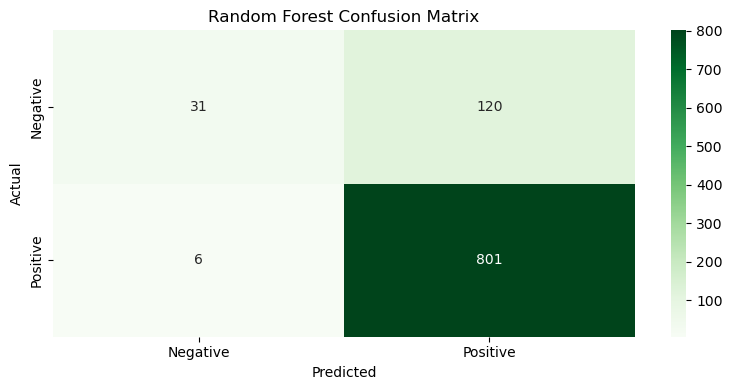

In [ ]:
# Plotting confusion matrix for the Random Forest Model
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax, cmap='Greens',xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

Choosing the best performing model 

In [ ]:
# Choosing best model based on accuracy
if accuracy_score_log_reg >= accuracy_score_rf:
    best_model = 'Logistic Regression'
    best_accuracy = accuracy_score_log_reg
else:
    best_model = 'Random Forest'
    best_accuracy = accuracy_score_rf

print(f"Random Forest with Accuracy an accuracy of {accuracy_score_rf}")

print('\
Conclusions:')
print('After performing EDA, preprocessing the text, and evaluating models, we conclude that ' + best_model + ' is the best with an accuracy \nof ' + str(round(best_accuracy, 4)) + '.')


Random Forest with Accuracy an accuracy of 0.8684759916492694
Conclusions:
After performing EDA, preprocessing the text, and evaluating models, we conclude that Random Forest is the best with an accuracy 
of 0.8685.


## Recommendation and Insights
### Random Forest is the best classification model for Postiive and Negative emotions due to its his baseline accuracy scores
This implies that the actual verses predicted emotions in the tweets will be subject to higher accuracy in classification
### Actual and Predicted labels demonstrate alignment; 
This implies that there will be no confusion in the intwrpretation of the emotions
### The balanced color mapping highlights clear distinctions between positive and negative emotions
This depiction is useful in determining areas to be improved in the model but for this case it performs well

## Conclusion
### A single Tweet from Apple or Google can be use in predicting the emotions towards the product or brand.
### Classification models have high accuracy in predicting the emotions from a tweet text
### Possible errors in LogisticRegression Model can be reduced further by implementing the RandomForest Model
### Tweet_texts are useful in identifying a problem with a product or brand from either Google or Apple, this informs on areas for improvement.